# Notebook to check if the individual glacier interannual variability coincides between glacier models
- related to [PartB_1_annual_variability.ipynb](PartB_1_annual_variability.ipynb), but here we look at individual glaciers to check if the interannual variability is similar between glacier models

- attention: area is too large in the GloGEMFlow per glacier files (factor of 1e6)

In [22]:
save_path = f'/home/www/lschuster/runs_glacierMIP3_oggm_v16/output/RGI11/'
#save_path = os.path.join(OUTPUT_DIR, 'RGI' + rgi_reg)
import os 
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
files = os.listdir(path=save_path)

In [11]:
fpath = '/home/www/lschuster/glacierMIP3_analysis/GloGEMflow/glogemflow_individual_glacier_check/'

test_fs = ['Compagno_rgi11_dyn_1995-2014_mri-esm2-0_hist.nc',
           'Compagno_rgi11_dyn_2021-2040_gfdl-esm4_ssp370.nc',
           'Compagno_rgi11_dyn_2061-2080_mpi-esm1-2-hr_ssp126.nc']

fpath_sum = '/home/www/lschuster/glacierMIP3_analysis/GloGEMflow/'
test_fs_sum = ['GloGEMflow_rgi11_sum_1995-2014_mri-esm2-0_hist.nc',
           'GloGEMflow_rgi11_sum_2021-2040_gfdl-esm4_ssp370.nc',
           'GloGEMflow_rgi11_sum_2061-2080_mpi-esm1-2-hr_ssp126.nc']

# PyGEM
fpath_pygem = '/home/www/drounce/per_glacier-filled-norunaway/11/'
test_fs_pygem = ['Rounce_rgi11_glaciers_1995-2014_mri-esm2-0_hist_Batch-1001-2000.nc',
                 'Rounce_rgi11_glaciers_2021-2040_gfdl-esm4_ssp370_Batch-1001-2000.nc',
                 'Rounce_rgi11_glaciers_2061-2080_mpi-esm1-2-hr_ssp126_Batch-1001-2000.nc']

# OGGM
oggm_fpath = '/home/www/lschuster/runs_glacierMIP3_oggm_v16/output/RGI11/'
oggm_test_fs= ['mri-esm2-0_historical_1995-2014.nc',
           'gfdl-esm4_ssp370_2021-2040.nc',
           'mpi-esm1-2-hr_ssp126_2061-2080.nc']

In [12]:
xr.open_dataset(fpath_sum+test_fs_sum[0])

<xarray.Dataset>
Dimensions:          (y: 5000, x: 1)
Dimensions without coordinates: y, x
Data variables:
    area_m2          (y, x) float64 ...
    volume_m3        (y, x) float64 ...
    simulation_year  (y, x) float64 ...
Attributes:
    contributor:       Compagno
    contributor_mail:  compagno@vaw.baug.ethz.ch
    creation_date:     07-Mar-2022 19:46:26
    reg_region:        rgi11
    period:            1995-2014
    gcm:               mri-esm2-0
    ssp:               hist
    information:       no info

In [13]:
xr.open_dataset(fpath+test_fs[0]).sel(x=1450-1).volume_m3

<xarray.DataArray 'volume_m3' (y: 5000)>
array([1.396896e+10, 1.396466e+10, 1.396190e+10, ..., 7.868908e+09,
       7.854317e+09, 7.814493e+09])
Dimensions without coordinates: y
Attributes:
    units:      m3
    long_name:  regional glacier volume at timestamp

In [14]:
xr.open_dataset(fpath+test_fs[0]).sel(x=1450).volume_m3

<xarray.DataArray 'volume_m3' (y: 5000)>
array([0., 0., 0., ..., 0., 0., 0.])
Dimensions without coordinates: y
Attributes:
    units:      m3
    long_name:  regional glacier volume at timestamp

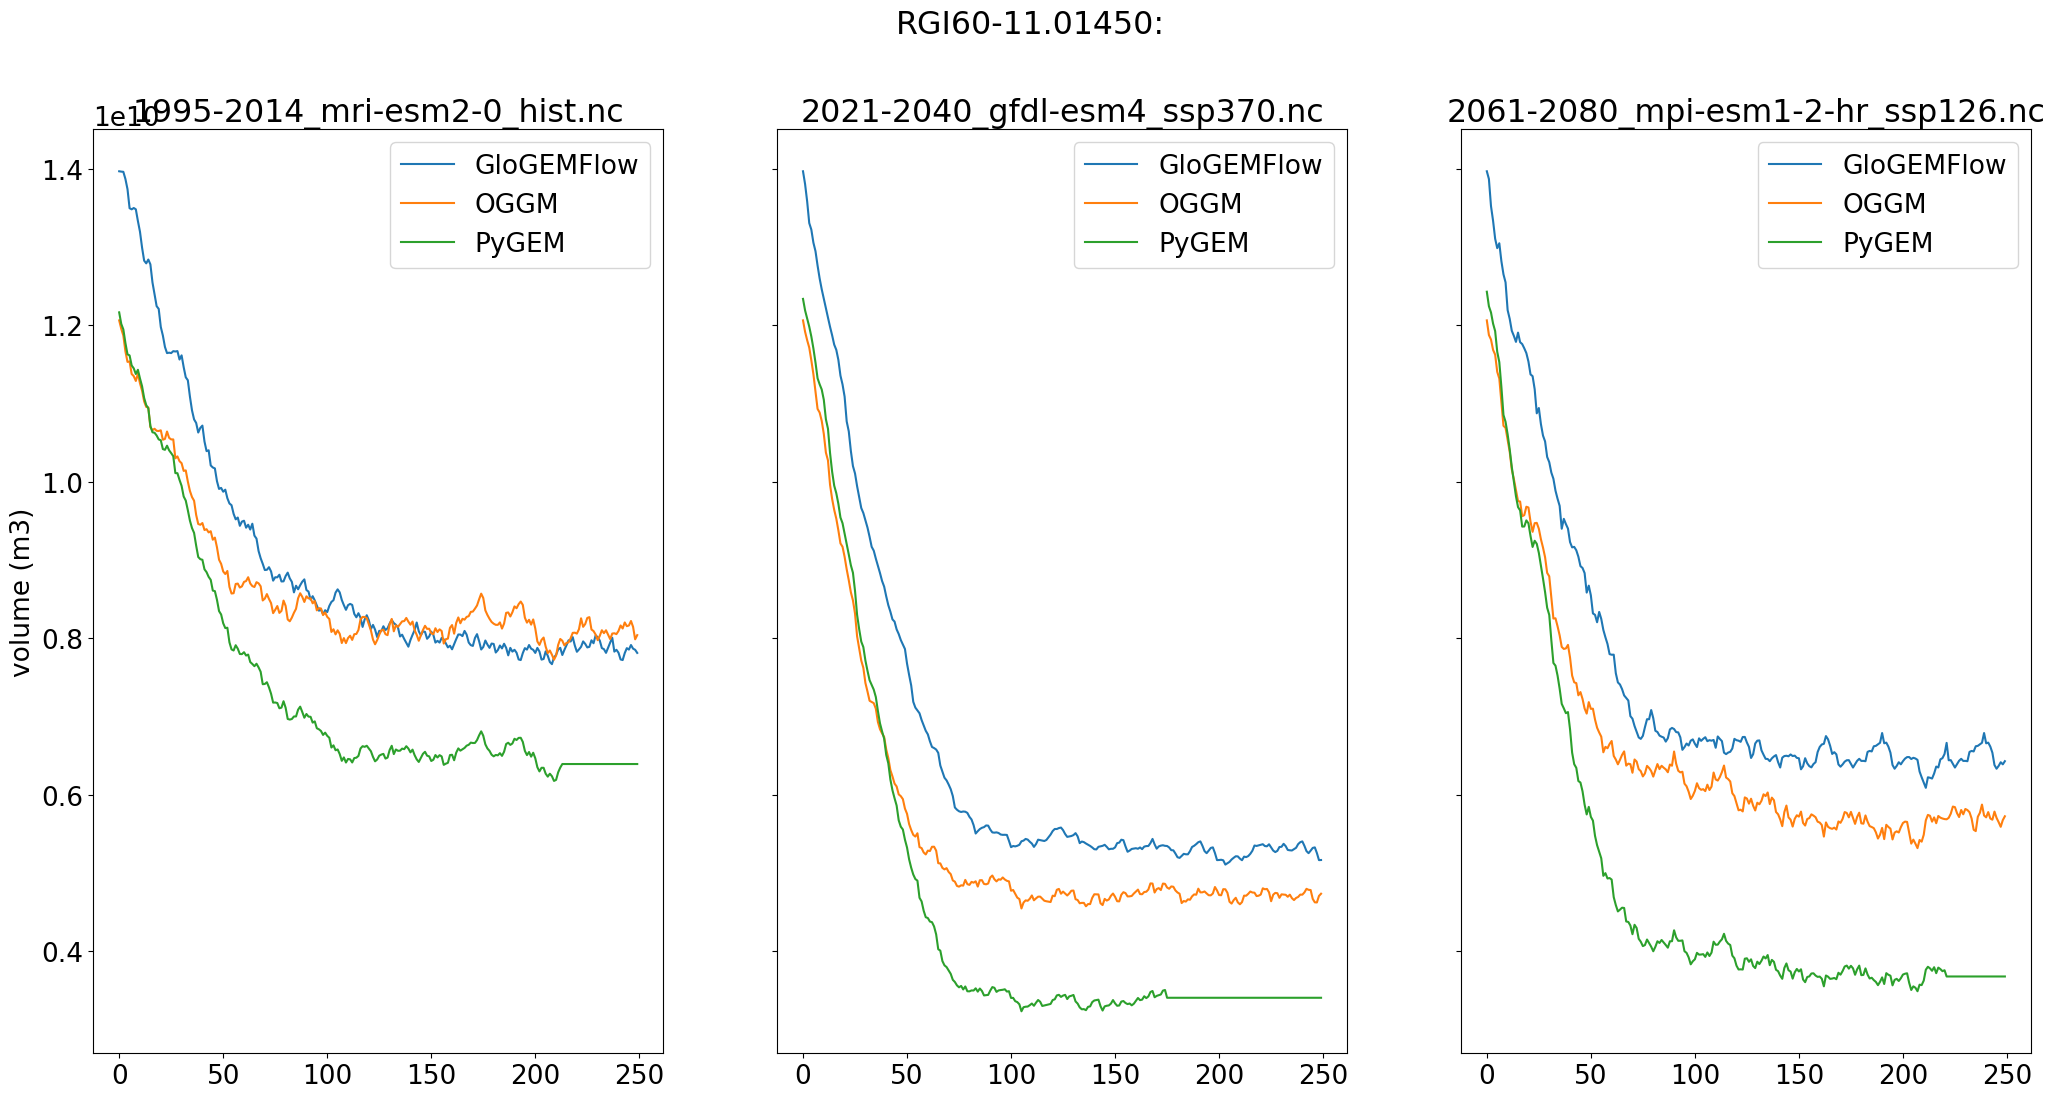

In [16]:
fig,axs = plt.subplots(1,3, figsize=(25,12), sharey=True, sharex=True)
plt.rc('font', size=19)   
plt.suptitle('RGI60-11.01450:')
for j in [0,1,2]:
    axs[j].set_title(test_fs[j][19:])
    ds = xr.open_dataset(fpath+test_fs[j])
    ds_sel = ds.sel(x=ds.volume_m3.argmax(dim='x')[0].values)
    axs[j].plot(ds_sel.volume_m3.isel(y=slice(0,250)), label='GloGEMFlow')

    ds_oggm = xr.open_dataset(oggm_fpath+oggm_test_fs[j])
    ds_sel = ds_oggm.sel(rgi_id=ds_oggm.volume.idxmax(dim='rgi_id')[0].values)
    axs[j].plot(ds_sel.volume.isel(time=slice(0,250)), label='OGGM')


    ds_pygem_sel = xr.open_dataset(fpath_pygem+test_fs_pygem[j]).sel(rgi_id='RGI60-11.01450')
    axs[j].plot(ds_pygem_sel.volume_m3.isel(simulation_year=slice(0,250)), label='PyGEM')
    axs[j].legend()
    if j==0:
        axs[j].set_ylabel('volume (m3)')

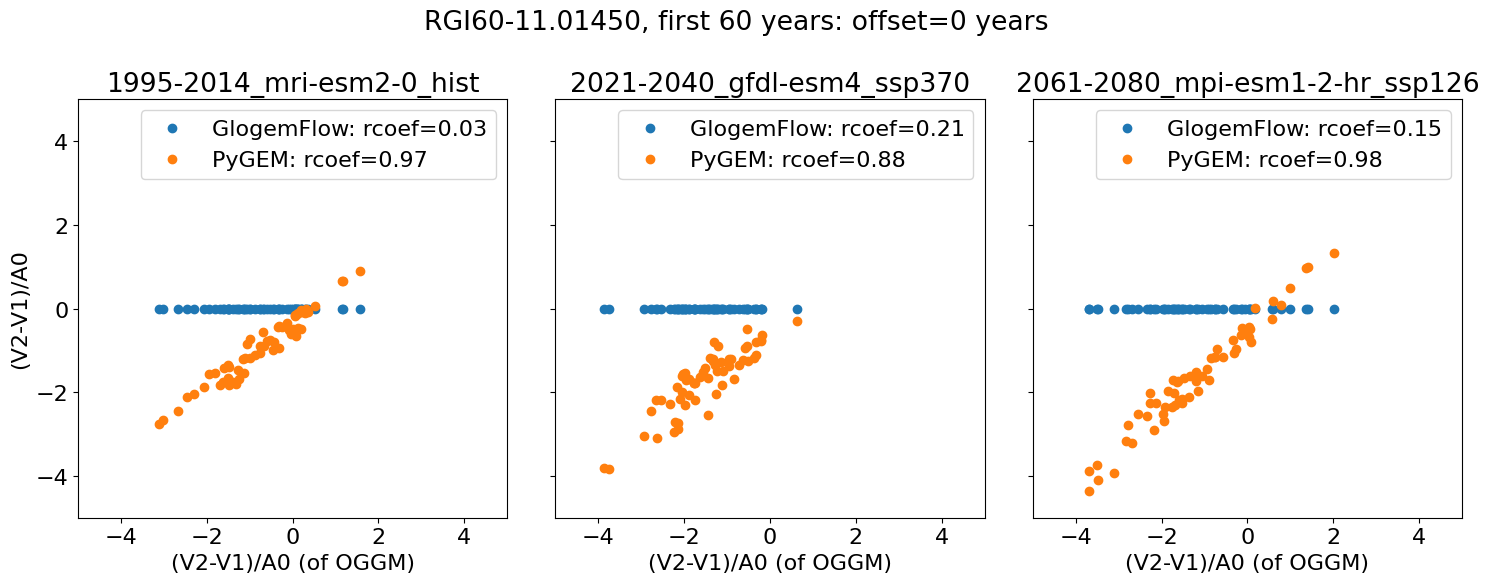

In [17]:
start = 0
y1 = 60
plt.rc('font', size=16)   
for offset in [0]: # ,1,2, 18,19,20]: ... there is no consistent pattern 
    fig,axs = plt.subplots(1,3, figsize=(15,6), sharey=True, sharex=True)
    plt.rc('font', size=16)   
    plt.suptitle(f'RGI60-11.01450, first 60 years: offset={offset} years')
    for j in [0,1,2]:
        axs[j].set_title(test_fs[j][19:-3])

        ds_oggm = xr.open_dataset(oggm_fpath+oggm_test_fs[j])
        ds_sel = ds_oggm.sel(rgi_id=ds_oggm.volume.idxmax(dim='rgi_id')[0].values)
        V0 = ds_sel.isel(time=slice(start+0,start+y1-1)).volume
        A0 = ds_sel.isel(time=slice(start+0,start+y1-1)).area.values
        V1 = ds_sel.isel(time=slice(start+1,start+y1)).volume.values
        delta_scaled_V_oggm = (V1-V0)/A0

        ds = xr.open_dataset(fpath+test_fs[j])
        ds_sel = ds.sel(x=ds.volume_m3.argmax(dim='x')[0].values)
        V0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).volume_m3
        A0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).area_m2.values*1e6
        V1 = ds_sel.isel(y=slice(start+1+offset,start+y1+offset)).volume_m3.values
        delta_scaled_V_glogemflow = (V1-V0)/A0
        glogemflow_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                                delta_scaled_V_glogemflow.values])[0][1]

        ds_pygem_sel = xr.open_dataset(fpath_pygem+test_fs_pygem[j]).sel(rgi_id='RGI60-11.01450')
        V0 = ds_pygem_sel.isel(simulation_year=slice(start+0,start+y1-1)).volume_m3
        A0 = ds_pygem_sel.isel(simulation_year=slice(start+0,start+y1-1)).area_m2.values
        V1 = ds_pygem_sel.isel(simulation_year=slice(start+1,start+y1)).volume_m3.values
        delta_scaled_V_pygem = (V1-V0)/A0
        pygem_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                                delta_scaled_V_pygem.values])[0][1]

        axs[j].set_ylim([-5,5])
        axs[j].set_xlim([-5,5])

        axs[j].plot(delta_scaled_V_oggm, delta_scaled_V_glogemflow,
                 'o', label = f'GlogemFlow: rcoef={glogemflow_rcoeff:.2f}')
        axs[j].plot(delta_scaled_V_oggm, delta_scaled_V_pygem, 
                 'o', label = f'PyGEM: rcoef={pygem_rcoeff:.2f}')
        axs[j].set_ylabel('(V2-V1)/A0')
        axs[j].set_xlabel('(V2-V1)/A0 (of OGGM)')
        axs[j].legend()

        if j==0:
            axs[j].set_ylabel("(V2-V1)/A0")
        else:
            axs[j].set_ylabel("")
    plt.tight_layout()

**Some tests for GloGEMFlow**
- somehow only 216 glaciers have non-zero values
- and by scaling the 216 glaciers times 1.22 we get the same estimates as the regional volume file 

In [18]:
for test_f,test_f_sum in zip(test_fs,test_fs_sum):
    ds_glogemflow = xr.open_dataset(fpath+test_f)
    print(np.shape(ds_glogemflow.volume_m3.values))

    ds_glogemflow_sum = xr.open_dataset(fpath_sum+test_f_sum)

    #ds_glogemflowa_sel = ds_glogemflow.volume_m3.sel(x=ds_glogemflow.volume_m3.isel(y=0)> 0)
    ds_glogemflow_sel = ds_glogemflow.where(ds_glogemflow.volume_m3>0).dropna(how='all', dim='x')
    
    # 
    print(np.shape(ds_glogemflow_sel.volume_m3.values))
    init_sum_sel_glac = ds_glogemflow_sel.volume_m3.sum(dim='x').isel(y=0)
    init_sum = ds_glogemflow_sum.volume_m3.isel(y=0)*1e9
    ds_glogemflow_sel_vol_sc = ds_glogemflow_sel.volume_m3 * (init_sum/init_sum_sel_glac).values[0]
    print(init_sum/init_sum_sel_glac)
    # did they just do a simple scaling ??? YES!
    np.testing.assert_allclose(ds_glogemflow_sel_vol_sc.sum(dim='x'),
                               ds_glogemflow_sum.volume_m3.values.flatten()*1e9)

(5000, 3760)
(5000, 216)
<xarray.DataArray 'volume_m3' (x: 1)>
array([1.22147261])
Dimensions without coordinates: x
(5000, 3760)
(5000, 216)
<xarray.DataArray 'volume_m3' (x: 1)>
array([1.22147456])
Dimensions without coordinates: x
(5000, 3760)
(5000, 216)
<xarray.DataArray 'volume_m3' (x: 1)>
array([1.22147378])
Dimensions without coordinates: x


**Check correlation 

In [24]:
pd_offset = pd.DataFrame(index=np.arange(0,21,1))
for offset in np.arange(0,21,1):
    start = 0
    y1 = 60
    ds_oggm = xr.open_dataset(oggm_fpath+oggm_test_fs[-1])
    ds_sel = ds_oggm.sel(rgi_id=ds_oggm.volume.idxmax(dim='rgi_id')[0].values)
    V0 = ds_sel.isel(time=slice(start+0,start+y1-1)).volume
    A0 = ds_sel.isel(time=slice(start+0,start+y1-1)).area.values
    V1 = ds_sel.isel(time=slice(start+1,start+y1)).volume.values
    delta_scaled_V_oggm = (V1-V0)/A0

    ds = xr.open_dataset(fpath+test_fs[-1])
    ds_sel = ds.sel(x=ds.volume_m3.argmax(dim='x')[0].values)
    V0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).volume_m3
    A0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).area_m2.values/1e6
    V1 = ds_sel.isel(y=slice(start+1+offset,start+y1+offset)).volume_m3.values
    delta_scaled_V_glogemflow =  (V1-V0)/A0
    pd_offset.loc[offset, 'rcoef'] = np.corrcoef([delta_scaled_V_oggm.values,
                                                  delta_scaled_V_glogemflow.values])[0][1]


In [25]:
# largest corrcoef for that offset:
pd_offset.idxmax(), pd_offset.max()

(rcoef    19
 dtype: int64,
 rcoef    0.443884
 dtype: float64)

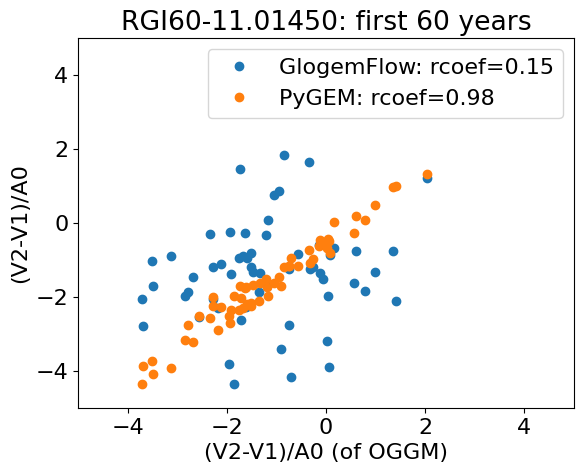

In [26]:
offset = 0
y1 = 60
ds_oggm = xr.open_dataset(oggm_fpath+oggm_test_fs[-1])
ds_sel = ds_oggm.sel(rgi_id=ds_oggm.volume.idxmax(dim='rgi_id')[0].values)
offset_o = 0
V0 = ds_sel.isel(time=slice(0+offset_o,y1-1+offset_o)).volume
A0 = ds_sel.isel(time=slice(0+offset_o,y1-1+offset_o)).area.values
V1 = ds_sel.isel(time=slice(1+offset_o,y1+offset_o)).volume.values
delta_scaled_V_oggm =  (V1-V0)/A0

ds = xr.open_dataset(fpath+test_fs[-1])
ds_sel = ds.sel(x=ds.volume_m3.argmax(dim='x')[0].values)
V0 = ds_sel.isel(y=slice(0+offset,y1-1+offset)).volume_m3
A0 = ds_sel.isel(y=slice(0+offset,y1-1+offset)).area_m2.values/1e6
V1 = ds_sel.isel(y=slice(1+offset,y1+offset)).volume_m3.values
delta_scaled_V_glogemflow =  (V1-V0)/A0
glogemflow_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                            delta_scaled_V_glogemflow.values])[0][1]



ds_pygem_sel = xr.open_dataset(fpath_pygem+test_fs_pygem[-1]).sel(rgi_id='RGI60-11.01450')
V0 = ds_pygem_sel.isel(simulation_year=slice(0+offset_o,y1-1+offset_o)).volume_m3
A0 = ds_pygem_sel.isel(simulation_year=slice(0+offset_o,y1-1+offset_o)).area_m2.values
V1 = ds_pygem_sel.isel(simulation_year=slice(1+offset_o,y1+offset_o)).volume_m3.values
delta_scaled_V_pygem = (V1-V0)/A0
pygem_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                            delta_scaled_V_pygem.values])[0][1]

plt.ylim([-5,5])
plt.xlim([-5,5])

plt.plot(delta_scaled_V_oggm, delta_scaled_V_glogemflow,
         'o', label = f'GlogemFlow: rcoef={glogemflow_rcoeff:.2f}')
plt.plot(delta_scaled_V_oggm, delta_scaled_V_pygem, 
         'o', label = f'PyGEM: rcoef={pygem_rcoeff:.2f}')
plt.title('RGI60-11.01450: first 60 years')
plt.ylabel('(V2-V1)/A0')
plt.xlabel('(V2-V1)/A0 (of OGGM)')
plt.legend()

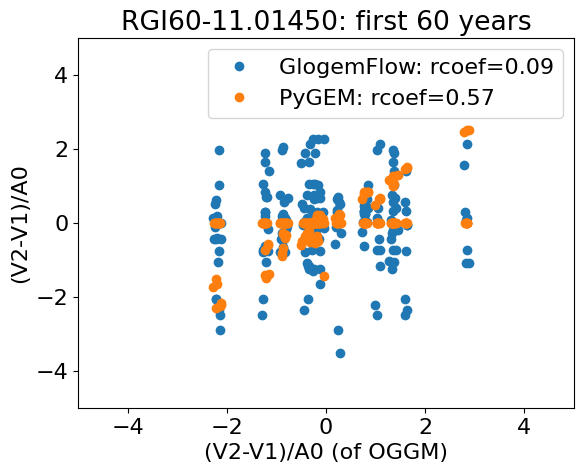

In [27]:
start =150
y1 = 200
ds_oggm = xr.open_dataset(oggm_fpath+oggm_test_fs[-1])
ds_sel = ds_oggm.sel(rgi_id=ds_oggm.volume.idxmax(dim='rgi_id')[0].values)
offset_o = 0
V0 = ds_sel.isel(time=slice(start+0+offset_o,start+y1-1+offset_o)).volume
A0 = ds_sel.isel(time=slice(start+0+offset_o,start+y1-1+offset_o)).area.values
V1 = ds_sel.isel(time=slice(start+1+offset_o,start+y1+offset_o)).volume.values
delta_scaled_V_oggm =  (V1-V0)/A0

ds = xr.open_dataset(fpath+test_fs[-1])
ds_sel = ds.sel(x=ds.volume_m3.argmax(dim='x')[0].values)
V0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).volume_m3
A0 = ds_sel.isel(y=slice(start+0+offset,start+y1-1+offset)).area_m2.values/1e6
V1 = ds_sel.isel(y=slice(start+1+offset,start+y1+offset)).volume_m3.values
delta_scaled_V_glogemflow =  (V1-V0)/A0
glogemflow_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                            delta_scaled_V_glogemflow.values])[0][1]



ds_pygem_sel = xr.open_dataset(fpath_pygem+test_fs_pygem[-1]).sel(rgi_id='RGI60-11.01450')
V0 = ds_pygem_sel.isel(simulation_year=slice(start+0+offset_o,start+y1-1+offset_o)).volume_m3
A0 = ds_pygem_sel.isel(simulation_year=slice(start+0+offset_o,start+y1-1+offset_o)).area_m2.values
V1 = ds_pygem_sel.isel(simulation_year=slice(start+1+offset_o,start+y1+offset_o)).volume_m3.values
delta_scaled_V_pygem = (V1-V0)/A0
pygem_rcoeff = np.corrcoef([delta_scaled_V_oggm.values,
                            delta_scaled_V_pygem.values])[0][1]

plt.ylim([-5,5])
plt.xlim([-5,5])

plt.plot(delta_scaled_V_oggm, delta_scaled_V_glogemflow,
         'o', label = f'GlogemFlow: rcoef={glogemflow_rcoeff:.2f}')
plt.plot(delta_scaled_V_oggm, delta_scaled_V_pygem, 
         'o', label = f'PyGEM: rcoef={pygem_rcoeff:.2f}')
plt.title('RGI60-11.01450: first 60 years')
plt.ylabel('(V2-V1)/A0')
plt.xlabel('(V2-V1)/A0 (of OGGM)')
plt.legend()

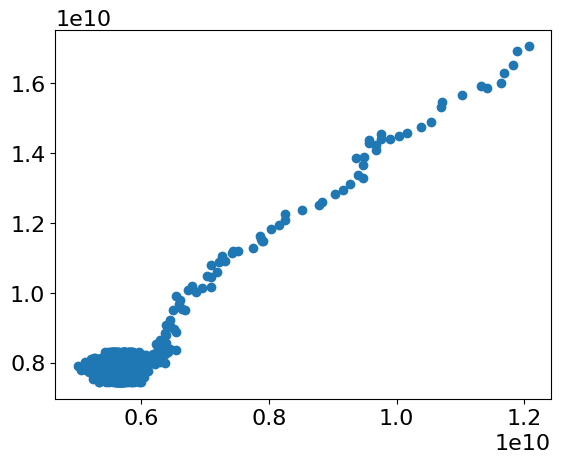

In [28]:
plt.plot(ds_oggm.max(dim='rgi_id').volume,
         ds_glogemflow_sel_vol_sc.max(dim='x').isel(y=slice(0,2001)), 'o')

In [29]:
ds_glogemflow_sum.volume_m3.values.flatten()

array([130.        , 128.26995651, 122.85406592, ...,  47.76222251,
        47.57634871,  48.15690259])

--> Problem: I don't know which glacier is which ... I just have a number going from 0 until, but we can obiously see that there are some glaciers missing 

Could it make sense to look at autocorrelation --> somehow it does not work, but I am not sure why???

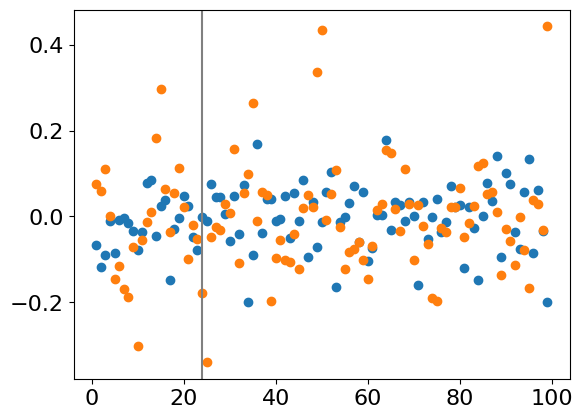

In [30]:
pd_delta_V_auto_corr = pd.DataFrame(index=np.arange(0,100))
for l in np.arange(1,100):
    pd_delta_V_auto_corr.loc[l,'OGGM'] = delta_scaled_V_oggm.to_series().autocorr(lag=l)
    pd_delta_V_auto_corr.loc[l,'GloGEMFlow'] = delta_scaled_V_glogemflow.to_series().autocorr(lag=l)
    
plt.plot(pd_delta_V_auto_corr, 'o')
plt.axvline(24, color = 'grey')